<a href="https://colab.research.google.com/github/lvnvn177/Steam_Store_Trend_Analysis/blob/main/Steam_game_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ÏÑ§Î™Ö

In [1]:
# Column
# Appid, Name, Is_free, Detail_description, About_the_game, Short_description, Header_image
# Website, Pc_requirements, LegalNotice, Developers, Publishers, Price_overview, Metacritic,
# Categories, Genres, Screenshots, Movies, Relased_date, Background, Postive, Negative, Score_rank, Tags

## Detail_description or About_the_game ÏùÑ ÌÜµÌï¥ ÏûêÏ£º ÏÇ¨Ïö©ÌïòÎäî keyword Hitmap ÌëúÌòÑ - Ï£º ÌëúÌòÑ Îã®Ïñ¥ Ï≤¥ÌÅ¨
## Ïó∞ÎèÑÎ≥Ñ Categorites, Genres Î•º ÌÜµÌï¥ ÏãúÎåÄÎ≥Ñ Ïù∏Í∏∞ Ïû•Î•¥ - ÏãúÎåÄÎ≥Ñ Ïù∏Í∏∞ Ïû•Î•¥ ÏãúÍ∞ÅÌôî
## Relsed_dateÎ•º ÌÜµÌï¥ Ïó∞ÎèÑÎ≥Ñ Î∂ÑÎ¶¨ - Í∞Å Ïó∞ÎèÑÎ≥Ñ ÎπÑÍµê
## TagsÎ•º ÌÜµÌï¥ Ïù∏Îîî Î∞è Í∏∞Ï°¥ Î∂ÑÎ¶¨ - Ïù∏ÎîîÏôÄ ÌöåÏÇ¨Ïùò Ìä∏Î†åÎìúÎäî Îã§Î•ºÍ≤É
## Metacrtic - Îã§ÏñëÌïú ÏãúÍ∞Å
## Youtube

# ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞

In [1]:
## Íµ¨Í∏Ä ÎìúÎùºÏù¥Î∏å Ïó∞Îèô
from google.colab import drive
# mount google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
## ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq
# !fc-cache -fv
# !rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False


In [4]:
import warnings
warnings.filterwarnings('ignore')

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú

In [ ]:
# Îç∞Ïù¥ÌÑ∞ ÏÖã Î°úÎìú
import shutil
import os

src_folder = '/content/drive/MyDrive/Data/Steam'
dst_folder = '/content/steam'

shutil.copytree(src_folder, dst_folder)

In [48]:
## Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df_steam_store = pd.read_csv("./steam/steam_games_processed_top_500.csv")
df_youtube = pd.read_csv("./steam/youtube_review_data.csv")

In [104]:
df_youtube_test = pd.read_csv("./steam/youtube_review_data.csv")

# Ï†ÑÏ≤òÎ¶¨

In [49]:
df_steam_store.columns

Index(['appid', 'name', 'about_the_game', 'background', 'categories',
       'detailed_description', 'developers', 'genres', 'header_image',
       'is_free', 'legal_notice', 'metacritic', 'movies', 'negative',
       'pc_requirements', 'positive', 'price_overview', 'publishers',
       'release_date', 'score_rank', 'screenshots', 'short_description',
       'tags', 'website'],
      dtype='object')

In [50]:
df_youtube.columns

Index(['Game Name', 'Video Title', 'Video ID', 'Published At', 'Views',
       'Likes', 'Comments'],
      dtype='object')

### Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞

In [51]:
cols_to_drop = ['appid', 'about_the_game','detailed_description','short_description','background', 'header_image', 'legal_notice', 'movies', 'screenshots', 'website']
df_steam_store = df_steam_store.drop(cols_to_drop, axis=1)

In [52]:
df_steam_store

name  \
0                        Counter-Strike 2   
1               Grand Theft Auto V Legacy   
2                     PUBG: BATTLEGROUNDS   
3                                Terraria   
4       Tom Clancy's Rainbow Six¬Æ Siege X   
..                                    ...   
485      Wolfenstein II: The New Colossus   
486                                Pacify   
487            Assetto Corsa Competizione   
488                           Watch_Dogs‚Ñ¢   
489  Shadow Tactics: Blades of the Shogun   

                                            categories             developers  \
0    [{'id': 1, 'description': 'Multi-player'}, {'i...              ['Valve']   
1    [{'id': 2, 'description': 'Single-player'}, {'...     ['Rockstar North']   
2    [{'id': 1, 'description': 'Multi-player'}, {'i...   ['PUBG Corporation']   
3    [{'id': 2, 'description': 'Single-player'}, {'...           ['Re-Logic']   
4    [{'id': 2, 'description': 'Single-player'}, {'...   ['Ubisoft Montreal']   
..                                                 ...                    ...   
485  [{'id': 2, 'description': 'Single-player'}, {'...       ['MachineGames']   
486  [{'id': 2, 'description': 'Single-player'}, {'...    ['Shawn Hitchcock']   
487  [{'id': 2, 'description': 'Single-player'}, {'...  ['Kunos Simulazioni']   
488  [{'id': 2, 'description': 'Single-player'}, {'...            ['Ubisoft']   
489  [{'id': 2, 'description': 'Single-player'}, {'...       ['Mimimi Games']   

                                                genres  is_free  \
0    [{'id': '1', 'description': 'Action'}, {'id': ...     True   
1    [{'id': '1', 'description': 'Action'}, {'id': ...    False   
2    [{'id': '1', 'description': 'Action'}, {'id': ...     True   
3    [{'id': '1', 'description': 'Action'}, {'id': ...    False   
4    [{'id': '1', 'description': 'Action'}, {'id': ...     True   
..                                                 ...      ...   
485             [{'id': '1', 'description': 'Action'}]    False   
486  [{'id': '1', 'description': 'Action'}, {'id': ...    False   
487  [{'id': '9', 'description': 'Racing'}, {'id': ...    False   
488  [{'id': '1', 'description': 'Action'}, {'id': ...    False   
489  [{'id': '23', 'description': 'Indie'}, {'id': ...    False   

                                            metacritic  negative  \
0                                                  NaN   1173003   
1    {'score': 96, 'url': 'https://www.metacritic.c...    250576   
2                                                  NaN   1037487   
3    {'score': 83, 'url': 'https://www.metacritic.c...     35494   
4                                                  NaN    225730   
..                                                 ...       ...   
485  {'score': 86, 'url': 'https://www.metacritic.c...      8413   
486                                                NaN      5620   
487  {'score': 77, 'url': 'https://www.metacritic.c...      2908   
488  {'score': 77, 'url': 'https://www.metacritic.c...      9953   
489  {'score': 85, 'url': 'https://www.metacritic.c...      1470   

                                       pc_requirements  positive  \
0    {'minimum': '<strong>Minimum:</strong><br><ul ...   7642084   
1    {'minimum': '<strong>Minimum:</strong><br><ul ...   1739980   
2    {'minimum': '<strong>Minimum:</strong><br><ul ...   1520457   
3    {'minimum': '<h2 class="bb_tag"><strong>REQUIR...   1373979   
4    {'minimum': '<strong>Minimum:</strong><br><ul ...   1172854   
..                                                 ...       ...   
485  {'minimum': '<strong>Minimum:</strong><br><ul ...     36084   
486  {'minimum': '<strong>Minimum:</strong><br><ul ...     36071   
487  {'minimum': '<strong>Minimum:</strong><br><ul ...     36035   
488  {'minimum': '<strong>Minimum:</strong><br><ul ...     35770   
489  {'minimum': '<strong>Minimum:</strong><br><ul ...     35767   

                                        price_overview  \
0                      

In [53]:
df_steam_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             490 non-null    object 
 1   categories       489 non-null    object 
 2   developers       490 non-null    object 
 3   genres           488 non-null    object 
 4   is_free          490 non-null    bool   
 5   metacritic       292 non-null    object 
 6   negative         490 non-null    int64  
 7   pc_requirements  490 non-null    object 
 8   positive         490 non-null    int64  
 9   price_overview   408 non-null    object 
 10  publishers       489 non-null    object 
 11  release_date     490 non-null    object 
 12  score_rank       0 non-null      float64
 13  tags             490 non-null    object 
dtypes: bool(1), float64(1), int64(2), object(10)
memory usage: 50.4+ KB


In [44]:
cols_to_drop = ['Video Title', 'Video ID', 'Published At']
df_youtube = df_youtube.drop(cols_to_drop, axis=1)

In [45]:
df_youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Game Name  990 non-null    object
 1   Views      990 non-null    int64 
 2   Likes      990 non-null    int64 
 3   Comments   990 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 31.1+ KB


In [46]:
df_youtube.head()

Game Name    Views  Likes  Comments
0  Counter-Strike: Global Offensive   329863   2220       838
1  Counter-Strike: Global Offensive   802933  73752      1450
2  Counter-Strike: Global Offensive    58758    490       105
3  Counter-Strike: Global Offensive   153010   1242      1518
4  Counter-Strike: Global Offensive  3833293  61455      2455

### 'release_date' Ïª¨Îüº 'yyyy-mm'ÏúºÎ°ú Ìè¨Îß∑ÌåÖ

In [47]:
# Í∑∏Î£πÌôîÌïòÏó¨ Ìï©Í≥Ñ ÏßëÍ≥Ñ
df_youtube_sum = df_youtube.groupby('Game Name', as_index=False).agg({
    'Views': 'sum',
    'Likes': 'sum',
    'Comments': 'sum'
})

# Í≤∞Í≥º ÌôïÏù∏
print(df_youtube_sum.head())

               Game Name    Views   Likes  Comments
0          7 Days to Die  1287747   21656      4039
1  ARK: Survival Evolved  3342214   51158     10331
2               Among Us  4977276  166078      4526
3           Apex Legends  3574041  101563     15881
4                 Arma 3  6014688  161098      5756


In [54]:
# -*- coding: utf-8 -*-
import pandas as pd
import ast
from datetime import datetime




# 'Release_date' Ïª¨ÎüºÏùò Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞Î•º ÌååÏïÖÌïòÍ≥† 'yyyy-mm' ÌòïÌÉúÎ°ú Ï†ÑÏ≤òÎ¶¨ÌïòÎäî Ìï®Ïàò
def format_release_date(date_str):
    """
    'Release_date' Ïª¨ÎüºÏùò Î¨∏ÏûêÏó¥ Îç∞Ïù¥ÌÑ∞Î•º ÌååÏã±ÌïòÏó¨ 'yyyy-mm' ÌòïÏãùÏúºÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§.
    Ïª¨ÎüºÏùò Îç∞Ïù¥ÌÑ∞Îäî "{'coming_soon': False, 'date': '21 Dec, 2017'}"ÏôÄ Í∞ôÏùÄ
    ÎîïÏÖîÎÑàÎ¶¨ ÌòïÌÉúÏùò Î¨∏ÏûêÏó¥Î°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.

    Args:
        date_str (str): 'Release_date' Ïª¨ÎüºÏùò ÏõêÎ≥∏ Î¨∏ÏûêÏó¥.

    Returns:
        str: 'yyyy-mm' ÌòïÏãùÏúºÎ°ú Î≥ÄÌôòÎêú ÎÇ†Ïßú Î¨∏ÏûêÏó¥. ÌååÏã±Ïóê Ïã§Ìå®ÌïòÎ©¥ NoneÏùÑ Î∞òÌôòÌï©ÎãàÎã§.
    """
    # NaN Í∞íÏù¥ÎÇò ÎπÑÏñ¥ÏûàÎäî Î¨∏ÏûêÏó¥ Îì±Ïùò ÏòàÏô∏ Ï≤òÎ¶¨
    if pd.isna(date_str):
        return None

    try:
        # ast.literal_evalÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Î¨∏ÏûêÏó¥ÏùÑ ÌååÏù¥Ïç¨ ÎîïÏÖîÎÑàÎ¶¨Î°ú ÏïàÏ†ÑÌïòÍ≤å Î≥ÄÌôò
        date_dict = ast.literal_eval(date_str)

        # 'date' ÌÇ§Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÎÇ†Ïßú Ï†ïÎ≥¥Î•º Ï∂îÏ∂ú
        date_info = date_dict.get('date')

        if date_info:
            # ÎÇ†Ïßú ÌòïÏãùÏùÄ '21 Dec, 2017' ÎòêÎäî 'Dec 21, 2017' Îì± Îã§ÏñëÌï† Ïàò ÏûàÏäµÎãàÎã§.
            # Ïó¨Îü¨ ÏùºÎ∞òÏ†ÅÏù∏ ÎÇ†Ïßú ÌòïÏãùÏùÑ ÏãúÎèÑÌïòÏó¨ ÌååÏã±Ìï©ÎãàÎã§.
            date_formats = ('%d %b, %Y', '%b %d, %Y', '%Y, %b %d')
            dt_object = None
            for fmt in date_formats:
                try:
                    # Î¨∏ÏûêÏó¥ÏóêÏÑú Í≥µÎ∞±ÏùÑ Ï†úÍ±∞ÌïòÏó¨ ÏïàÏ†ïÏÑ±ÏùÑ ÎÜíÏûÖÎãàÎã§.
                    dt_object = datetime.strptime(date_info.strip(), fmt)
                    break # ÏÑ±Í≥µÏ†ÅÏúºÎ°ú ÌååÏã±ÎêòÎ©¥ Î£®ÌîÑÎ•º Ï§ëÎã®Ìï©ÎãàÎã§.
                except ValueError:
                    continue

            if dt_object:
                # datetime Í∞ùÏ≤¥Î•º 'yyyy-mm' ÌòïÏãùÏùò Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôòÌïòÏó¨ Î∞òÌôò
                return dt_object.strftime('%Y-%m')
            else:
                # ÏïåÎ†§ÏßÑ ÌòïÏãùÏúºÎ°ú ÌååÏã±ÎêòÏßÄ ÏïäÏùÄ Í≤ΩÏö∞
                return None
        else:
            # 'date' ÌÇ§Í∞Ä ÏóÜÎäî Í≤ΩÏö∞
            return None

    except (ValueError, SyntaxError):
        # ast.literal_evalÏóêÏÑú Ïò§Î•òÍ∞Ä Î∞úÏÉùÌïòÍ±∞ÎÇò(ÏûòÎ™ªÎêú ÎîïÏÖîÎÑàÎ¶¨ ÌòïÏãù)
        # strptimeÏóêÏÑú ÎÇ†Ïßú ÌòïÏãù Î≥ÄÌôòÏóê Ïã§Ìå®Ìïú Í≤ΩÏö∞
        return None

# 'Release_date' Ïª¨ÎüºÏóê ÏúÑÏóêÏÑú Ï†ïÏùòÌïú Ìï®ÏàòÎ•º Ï†ÅÏö©ÌïòÏó¨ 'release_yyyy_mm'ÎùºÎäî ÏÉà Ïª¨ÎüºÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
df_steam_store['release_yyyy_mm'] = df_steam_store['release_date'].apply(format_release_date)

# Í≤∞Í≥º ÌôïÏù∏ÏùÑ ÏúÑÌï¥ ÏõêÎ≥∏ Ïª¨ÎüºÍ≥º Ï†ÑÏ≤òÎ¶¨Îêú Ïª¨ÎüºÏùò ÏùºÎ∂ÄÎ•º Ï∂úÎ†•Ìï©ÎãàÎã§.
print("Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ï†ÑÌõÑ ÎπÑÍµê (ÏÉÅÏúÑ 10Í∞ú):")
print(df_steam_store[['name', 'release_date', 'release_yyyy_mm']].head(10))

# Ï†ÑÏ≤òÎ¶¨ ÌõÑ Í≤∞Ï∏°Ïπò ÌôïÏù∏
print("\n'release_yyyy_mm' Ïª¨ÎüºÏùò Í≤∞Ï∏°Ïπò Í∞úÏàò:", df_steam_store['release_yyyy_mm'].isnull().sum())



Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ï†ÑÌõÑ ÎπÑÍµê (ÏÉÅÏúÑ 10Í∞ú):
                                name  \
0                   Counter-Strike 2   
1          Grand Theft Auto V Legacy   
2                PUBG: BATTLEGROUNDS   
3                           Terraria   
4  Tom Clancy's Rainbow Six¬Æ Siege X   
5                        Garry's Mod   
6                 Black Myth: Wukong   
7                               Rust   
8                    Team Fortress 2   
9                         ELDEN RING   

                                     release_date release_yyyy_mm  
0  {'coming_soon': False, 'date': '21 Aug, 2012'}         2012-08  
1  {'coming_soon': False, 'date': '13 Apr, 2015'}         2015-04  
2  {'coming_soon': False, 'date': '21 Dec, 2017'}         2017-12  
3  {'coming_soon': False, 'date': '16 May, 2011'}         2011-05  
4   {'coming_soon': False, 'date': '1 Dec, 2015'}         2015-12  
5  {'coming_soon': False, 'date': '29 Nov, 2006'}         2006-11  
6  {'coming_soon': False, 'date'

In [55]:
df_steam_store.dropna(subset=['release_yyyy_mm'], inplace=True)
print("\n'release_yyyy_mm' Ïª¨ÎüºÏùò Í≤∞Ï∏°Ïπò Í∞úÏàò:", df_steam_store['release_yyyy_mm'].isnull().sum())


'release_yyyy_mm' Ïª¨ÎüºÏùò Í≤∞Ï∏°Ïπò Í∞úÏàò: 0


* Ï†ÑÏ≤òÎ¶¨Ìïú Ïª¨ÎüºÏù∏ 'release_yyyy_mm' Ï∂îÍ∞Ä ÌõÑ
Î∂àÌïÑÏöîÌïú ÏõêÎ≥∏ Ïª¨Îüº 'release_date' Ï†úÍ±∞  

In [56]:
cols_to_drop = ['release_date']
df_steam_store = df_steam_store.drop(cols_to_drop, axis=1)

In [57]:
df_steam_store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 484 entries, 0 to 489
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             484 non-null    object 
 1   categories       483 non-null    object 
 2   developers       484 non-null    object 
 3   genres           482 non-null    object 
 4   is_free          484 non-null    bool   
 5   metacritic       288 non-null    object 
 6   negative         484 non-null    int64  
 7   pc_requirements  484 non-null    object 
 8   positive         484 non-null    int64  
 9   price_overview   404 non-null    object 
 10  publishers       483 non-null    object 
 11  score_rank       0 non-null      float64
 12  tags             484 non-null    object 
 13  release_yyyy_mm  484 non-null    object 
dtypes: bool(1), float64(1), int64(2), object(10)
memory usage: 53.4+ KB


### 'categories' Ïª¨Îüº Ï†ÑÏ≤òÎ¶¨


*   category_descriptions - Î∂àÌïÑÏöîÌïú 'id' Í∞í Ï†úÍ±∞

In [58]:
def extract_category_descriptions(category_data):
    try:
        # Î¨∏ÏûêÏó¥Ïù¥Î©¥ ÌååÏã±
        if isinstance(category_data, str):
            category_data = ast.literal_eval(category_data)
        # None, NaN, float Îì±ÏùÄ Î¨¥Ïãú
        if not isinstance(category_data, list):
            return []

        return [entry['description'] for entry in category_data if isinstance(entry, dict) and 'description' in entry]
    except Exception as e:
        print(f"Ïò§Î•ò Î∞úÏÉù: {e}")
        return []

# ÏÉà Ïª¨ÎüºÏúºÎ°ú Ï†ÄÏû•
df_steam_store['category_descriptions'] = df_steam_store['categories'].apply(extract_category_descriptions)

# ÌôïÏù∏
print(df_steam_store[['category_descriptions']].head())


                               category_descriptions
0  [Multi-player, Cross-Platform Multiplayer, Ste...
1  [Single-player, Multi-player, PvP, Online PvP,...
2  [Multi-player, PvP, Online PvP, Stats, Remote ...
3  [Single-player, Multi-player, PvP, Online PvP,...
4  [Single-player, Multi-player, PvP, Online PvP,...


### 'genres' Ïª¨Îüº Ï†ÑÏ≤òÎ¶¨


*   genre_descriptions - Î∂àÌïÑÏöîÌïú 'id' Í∞í Ï†úÍ±∞

In [59]:
def extract_genre_descriptions(genre_data):
    try:
        # Î¨∏ÏûêÏó¥Ïù¥ÎùºÎ©¥ ÌååÏã±
        if isinstance(genre_data, str):
            genre_data = ast.literal_eval(genre_data)
        # None, NaN, float Îì±ÏùÄ Î¨¥Ïãú
        if not isinstance(genre_data, list):
            return []

        return [entry['description'] for entry in genre_data if isinstance(entry, dict) and 'description' in entry]
    except Exception as e:
        print(f"Ïò§Î•ò Î∞úÏÉù: {e}")
        return []
df_steam_store['genre_descriptions'] = df_steam_store['genres'].apply(extract_genre_descriptions)

# ÌôïÏù∏
print(df_steam_store[['genres', 'genre_descriptions']].head())

                                              genres  \
0  [{'id': '1', 'description': 'Action'}, {'id': ...   
1  [{'id': '1', 'description': 'Action'}, {'id': ...   
2  [{'id': '1', 'description': 'Action'}, {'id': ...   
3  [{'id': '1', 'description': 'Action'}, {'id': ...   
4  [{'id': '1', 'description': 'Action'}, {'id': ...   

                                  genre_descriptions  
0                             [Action, Free To Play]  
1                                [Action, Adventure]  
2  [Action, Adventure, Massively Multiplayer, Fre...  
3                    [Action, Adventure, Indie, RPG]  
4                             [Action, Free To Play]  


### 'metacritic' Ïª¨Îüº Ï†ÑÏ≤òÎ¶¨


*   metacritic_score - Î©îÌÉÄÌÅ¨Î¶¨Ìã± Ï†êÏàò, Î∂àÌïÑÏöîÌïú 'url' Í∞í Ï†úÍ±∞

Î©îÌÉÄÌÅ¨Î¶¨Ìã±Ïù¥ÎûÄ?

ÏòÅÌôî, ÏùåÏïÖ, Í≤åÏûÑ Îì± ÎØ∏ÎîîÏñ¥Îì§ÏùÑ ÎπÑÌèâ ÌõÑ Ï†êÏàòÎ°ú ÎÇ®Í∏∞Îäî Îã®Ï≤¥


In [60]:
def extract_metacritic_score(meta_data):
    try:
        # Î¨∏ÏûêÏó¥Ïù¥Î©¥ ÌååÏã±
        if isinstance(meta_data, str):
            meta_data = ast.literal_eval(meta_data)
        # ÎîïÏÖîÎÑàÎ¶¨Ïù¥Í≥† 'score' ÌÇ§Í∞Ä ÏûàÏúºÎ©¥ Î∞òÌôò
        if isinstance(meta_data, dict) and 'score' in meta_data:
            return meta_data['score']
        return None
    except Exception as e:
        print(f"Ïò§Î•ò Î∞úÏÉù: {e}")
        return None
df_steam_store['metacritic_score'] = df_steam_store['metacritic'].apply(extract_metacritic_score)

# ÏÉÅÏúÑ Î™á Í∞ú ÌôïÏù∏
print(df_steam_store[['metacritic_score']].head())

   metacritic_score
0               NaN
1              96.0
2               NaN
3              83.0
4               NaN


### 'price_overview' Ïª¨Îüº Ï†ÑÏ≤òÎ¶¨


*   price_initial - Í∏∞Ï°¥Í∞ÄÍ≤©
*   price_final - Ìï†Ïù∏Í∞ÄÍ≤©
*   discount_percent - Ìï†Ïù∏ÎπÑÏú®



In [61]:
def extract_price_info(price_data):
    try:
        # Î¨∏ÏûêÏó¥Ïù¥Î©¥ ÌååÏã±
        if isinstance(price_data, str):
            price_data = ast.literal_eval(price_data)
        if not isinstance(price_data, dict):
            return None, None, None

        initial_price = price_data.get('initial', 0) / 100
        final_price = price_data.get('final', 0) / 100
        discount = price_data.get('discount_percent', 0)
        return initial_price, final_price, discount
    except Exception as e:
        print(f"Ïò§Î•ò Î∞úÏÉù: {e}")
        return None, None, None
df_steam_store[['price_initial', 'price_final', 'discount_percent']] = df_steam_store['price_overview'].apply(extract_price_info).apply(pd.Series)

# ÌôïÏù∏
print(df_steam_store[['price_initial', 'price_final', 'discount_percent']].head())

   price_initial  price_final  discount_percent
0            NaN          NaN               NaN
1            NaN          NaN               NaN
2            NaN          NaN               NaN
3        11000.0       5500.0              50.0
4            NaN          NaN               NaN


### 'tags' Ïª¨Îüº Ï†ÑÏ≤òÎ¶¨


*   tags_list - Í∞Å ÌÉúÍ∑∏ Í∞í

In [62]:
def extract_tags_list(tag_data):
    try:
        # Î¨∏ÏûêÏó¥Ïù¥Î©¥ ÏïàÏ†ÑÌïòÍ≤å ÌååÏã±
        if isinstance(tag_data, str):
            tag_data = ast.literal_eval(tag_data)
        if not isinstance(tag_data, dict):
            return []

        return list(tag_data.keys())  # Ï†êÏàò Ï†úÏô∏ÌïòÍ≥† ÌÉúÍ∑∏Îßå Î¶¨Ïä§Ìä∏Î°ú Ï∂îÏ∂ú
    except Exception as e:
        print(f"Ïò§Î•ò Î∞úÏÉù: {e}")
        return []
df_steam_store['tags_list'] = df_steam_store['tags'].apply(extract_tags_list)

# ÌôïÏù∏
print(df_steam_store[['tags', 'tags_list']].head())

                                                tags  \
0  {'FPS': 91172, 'Shooter': 65634, 'Multiplayer'...   
1  {'Open World': 32676, 'Action': 23557, 'Multip...   
2  {'Survival': 14893, 'Shooter': 12788, 'Battle ...   
3  {'Open World Survival Craft': 16503, 'Sandbox'...   
4  {'FPS': 9892, 'PvP': 9194, 'Multiplayer': 9103...   

                                           tags_list  
0  [FPS, Shooter, Multiplayer, Competitive, Actio...  
1  [Open World, Action, Multiplayer, Crime, Autom...  
2  [Survival, Shooter, Battle Royale, Multiplayer...  
3  [Open World Survival Craft, Sandbox, Survival,...  
4  [FPS, PvP, Multiplayer, Tactical, e-sports, Sh...  


In [63]:
cols_to_drop = ['categories', 'genres', 'metacritic', 'price_overview', 'tags']
df_steam_store = df_steam_store.drop(cols_to_drop, axis=1)

In [64]:
df_steam_store.head()

name            developers  is_free  negative  \
0                   Counter-Strike 2             ['Valve']     True   1173003   
1          Grand Theft Auto V Legacy    ['Rockstar North']    False    250576   
2                PUBG: BATTLEGROUNDS  ['PUBG Corporation']     True   1037487   
3                           Terraria          ['Re-Logic']    False     35494   
4  Tom Clancy's Rainbow Six¬Æ Siege X  ['Ubisoft Montreal']     True    225730   

                                     pc_requirements  positive  \
0  {'minimum': '<strong>Minimum:</strong><br><ul ...   7642084   
1  {'minimum': '<strong>Minimum:</strong><br><ul ...   1739980   
2  {'minimum': '<strong>Minimum:</strong><br><ul ...   1520457   
3  {'minimum': '<h2 class="bb_tag"><strong>REQUIR...   1373979   
4  {'minimum': '<strong>Minimum:</strong><br><ul ...   1172854   

           publishers  score_rank release_yyyy_mm  \
0           ['Valve']         NaN         2012-08   
1  ['Rockstar Games']         NaN         2015-04   
2   ['KRAFTON, Inc.']         NaN         2017-12   
3        ['Re-Logic']         NaN         2011-05   
4         ['Ubisoft']         NaN         2015-12   

                               category_descriptions  \
0  [Multi-player, Cross-Platform Multiplayer, Ste...   
1  [Single-player, Multi-player, PvP, Online PvP,...   
2  [Multi-player, PvP, Online PvP, Stats, Remote ...   
3  [Single-player, Multi-player, PvP, Online PvP,...   
4  [Single-player, Multi-player, PvP, Online PvP,...   

                                  genre_descriptions  metacritic_score  \
0                             [Action, Free To Play]               NaN   
1                                [Action, Adventure]              96.0   
2  [Action, Adventure, Massively Multiplayer, Fre...               NaN   
3                    [Action, Adventure, Indie, RPG]              83.0   
4                             [Action, Free To Play]               NaN   

   price_initial  price_final  discount_percent  \
0            NaN          NaN               NaN   
1            NaN          NaN               NaN   
2            NaN          NaN               NaN   
3        11000.0       5500.0              50.0   
4            NaN          NaN               NaN   

                                           tags_list  
0  [FPS, Shooter, Multiplayer, Competitive, Actio...  
1  [Open World, Action, Multiplayer, Crime, Autom...  
2  [Survival, Shooter, Battle Royale, Multiplayer...  
3  [Open World Survival Craft, Sandbox, Survival,...  
4  [FPS, PvP, Multiplayer, Tactical, e-sports, Sh...

In [65]:
cols_to_drop = ['pc_requirements']
df_steam_store = df_steam_store.drop(cols_to_drop, axis=1)

In [66]:
df_steam_store.head()

name            developers  is_free  negative  \
0                   Counter-Strike 2             ['Valve']     True   1173003   
1          Grand Theft Auto V Legacy    ['Rockstar North']    False    250576   
2                PUBG: BATTLEGROUNDS  ['PUBG Corporation']     True   1037487   
3                           Terraria          ['Re-Logic']    False     35494   
4  Tom Clancy's Rainbow Six¬Æ Siege X  ['Ubisoft Montreal']     True    225730   

   positive          publishers  score_rank release_yyyy_mm  \
0   7642084           ['Valve']         NaN         2012-08   
1   1739980  ['Rockstar Games']         NaN         2015-04   
2   1520457   ['KRAFTON, Inc.']         NaN         2017-12   
3   1373979        ['Re-Logic']         NaN         2011-05   
4   1172854         ['Ubisoft']         NaN         2015-12   

                               category_descriptions  \
0  [Multi-player, Cross-Platform Multiplayer, Ste...   
1  [Single-player, Multi-player, PvP, Online PvP,...   
2  [Multi-player, PvP, Online PvP, Stats, Remote ...   
3  [Single-player, Multi-player, PvP, Online PvP,...   
4  [Single-player, Multi-player, PvP, Online PvP,...   

                                  genre_descriptions  metacritic_score  \
0                             [Action, Free To Play]               NaN   
1                                [Action, Adventure]              96.0   
2  [Action, Adventure, Massively Multiplayer, Fre...               NaN   
3                    [Action, Adventure, Indie, RPG]              83.0   
4                             [Action, Free To Play]               NaN   

   price_initial  price_final  discount_percent  \
0            NaN          NaN               NaN   
1            NaN          NaN               NaN   
2            NaN          NaN               NaN   
3        11000.0       5500.0              50.0   
4            NaN          NaN               NaN   

                                           tags_list  
0  [FPS, Shooter, Multiplayer, Competitive, Actio...  
1  [Open World, Action, Multiplayer, Crime, Autom...  
2  [Survival, Shooter, Battle Royale, Multiplayer...  
3  [Open World Survival Craft, Sandbox, Survival,...  
4  [FPS, PvP, Multiplayer, Tactical, e-sports, Sh...

In [67]:
print("\n Í≤∞Ï∏°Ïπò Í∞úÏàò:", df_steam_store['metacritic_score'].isnull().sum())
print("\n Í≤∞Ï∏°Ïπò Í∞úÏàò:", df_steam_store['price_initial'].isnull().sum())
print("\n Í≤∞Ï∏°Ïπò Í∞úÏàò:", df_steam_store['price_final'].isnull().sum())
print("\n Í≤∞Ï∏°Ïπò Í∞úÏàò:", df_steam_store['discount_percent'].isnull().sum())


 Í≤∞Ï∏°Ïπò Í∞úÏàò: 196

 Í≤∞Ï∏°Ïπò Í∞úÏàò: 80

 Í≤∞Ï∏°Ïπò Í∞úÏàò: 80

 Í≤∞Ï∏°Ïπò Í∞úÏàò: 80


In [68]:
cols_to_drop = ['metacritic_score', 'price_initial', 'price_final', 'discount_percent', 'score_rank']
df_steam_store = df_steam_store.drop(cols_to_drop, axis=1)

In [70]:
df_steam_store.isnull().sum()

name                     0
developers               0
is_free                  0
negative                 0
positive                 0
publishers               1
release_yyyy_mm          0
category_descriptions    0
genre_descriptions       0
tags_list                0
dtype: int64

In [86]:
import ast

df_steam_store = df_steam_store[df_steam_store['publishers'].notna()]
df_steam_store['release_yyyy_mm'] = pd.to_datetime(df_steam_store['release_yyyy_mm'], format='%Y-%m')

In [88]:
df_steam_store['name'] = df_steam_store['name'].astype('str')

In [78]:
df_steam_store.head()

name            developers  is_free  negative  \
0                   Counter-Strike 2             ['Valve']     True   1173003   
1          Grand Theft Auto V Legacy    ['Rockstar North']    False    250576   
2                PUBG: BATTLEGROUNDS  ['PUBG Corporation']     True   1037487   
3                           Terraria          ['Re-Logic']    False     35494   
4  Tom Clancy's Rainbow Six¬Æ Siege X  ['Ubisoft Montreal']     True    225730   

   positive          publishers release_yyyy_mm  \
0   7642084           ['Valve']         2012-08   
1   1739980  ['Rockstar Games']         2015-04   
2   1520457   ['KRAFTON, Inc.']         2017-12   
3   1373979        ['Re-Logic']         2011-05   
4   1172854         ['Ubisoft']         2015-12   

                               category_descriptions  \
0  [Multi-player, Cross-Platform Multiplayer, Ste...   
1  [Single-player, Multi-player, PvP, Online PvP,...   
2  [Multi-player, PvP, Online PvP, Stats, Remote ...   
3  [Single-player, Multi-player, PvP, Online PvP,...   
4  [Single-player, Multi-player, PvP, Online PvP,...   

                                  genre_descriptions  \
0                             [Action, Free To Play]   
1                                [Action, Adventure]   
2  [Action, Adventure, Massively Multiplayer, Fre...   
3                    [Action, Adventure, Indie, RPG]   
4                             [Action, Free To Play]   

                                           tags_list  
0  [FPS, Shooter, Multiplayer, Competitive, Actio...  
1  [Open World, Action, Multiplayer, Crime, Autom...  
2  [Survival, Shooter, Battle Royale, Multiplayer...  
3  [Open World Survival Craft, Sandbox, Survival,...  
4  [FPS, PvP, Multiplayer, Tactical, e-sports, Sh...

In [89]:
df_steam_store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 483 entries, 0 to 489
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   483 non-null    object        
 1   developers             483 non-null    object        
 2   is_free                483 non-null    bool          
 3   negative               483 non-null    int64         
 4   positive               483 non-null    int64         
 5   publishers             483 non-null    object        
 6   release_yyyy_mm        483 non-null    datetime64[ns]
 7   category_descriptions  483 non-null    object        
 8   genre_descriptions     483 non-null    object        
 9   tags_list              483 non-null    object        
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 38.2+ KB


In [77]:
df_youtube_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Game Name  99 non-null     object
 1   Views      99 non-null     int64 
 2   Likes      99 non-null     int64 
 3   Comments   99 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 3.2+ KB


In [90]:
# Ïú†ÌäúÎ∏å Î∞è Ïä§ÌåÄ ÏÉÅÏ†ê Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
df_merged = pd.merge(df_steam_store, df_youtube_sum, left_on='name', right_on='Game Name')

In [95]:
df_merged.head()

name           developers  is_free  negative  \
0  Grand Theft Auto V Legacy     [Rockstar North]    False    250576   
1        PUBG: BATTLEGROUNDS   [PUBG Corporation]     True   1037487   
2                   Terraria           [Re-Logic]    False     35494   
3                Garry's Mod  [Facepunch Studios]    False     37161   
4         Black Myth: Wukong       [Game Science]    False     38378   

   positive        publishers release_yyyy_mm  \
0   1739980  [Rockstar Games]      2015-04-01   
1   1520457   [KRAFTON, Inc.]      2017-12-01   
2   1373979        [Re-Logic]      2011-05-01   
3   1122546           [Valve]      2006-11-01   
4   1111720    [Game Science]      2024-08-01   

                               category_descriptions  \
0  [Single-player, Multi-player, PvP, Online PvP,...   
1  [Multi-player, PvP, Online PvP, Stats, Remote ...   
2  [Single-player, Multi-player, PvP, Online PvP,...   
3  [Single-player, Multi-player, PvP, Online PvP,...   
4  [Single-player, Steam Achievements, Full contr...   

                                  genre_descriptions  \
0                                [Action, Adventure]   
1  [Action, Adventure, Massively Multiplayer, Fre...   
2                    [Action, Adventure, Indie, RPG]   
3                        [Casual, Indie, Simulation]   
4                           [Action, Adventure, RPG]   

                                           tags_list  \
0  [Open World, Action, Multiplayer, Crime, Autom...   
1  [Survival, Shooter, Battle Royale, Multiplayer...   
2  [Open World Survival Craft, Sandbox, Survival,...   
3  [Sandbox, Moddable, Multiplayer, Physics, Buil...   
4  [Mythology, Action RPG, Action, Souls-like, RP...   

                   Game Name     Views   Likes  Comments  
0  Grand Theft Auto V Legacy   4123142   88526      9922  
1        PUBG: BATTLEGROUNDS   4929503  133979     10908  
2                   Terraria   9172772  272214     32450  
3                Garry's Mod  12930548  599469      9120  
4         Black Myth: Wukong   8862863  272618     29202

In [91]:
# Ï†ÄÏû• Í≤ΩÎ°ú ÏÑ§Ï†ï (Ïòà: ÎÇ¥ ÎìúÎùºÏù¥Î∏å > steam_data Ìè¥Îçî)
save_path_1 = '/content/drive/MyDrive/Data/Steam/Preprocessing/df_steam_top_500.csv'
save_path_2 = '/content/drive/MyDrive/Data/Steam/Preprocessing/df_youtube_sum_top_500.csv'
save_path_3 = '/content/drive/MyDrive/Data/Steam/Preprocessing/df_steam_youtube_merged.csv'
# CSV Ï†ÄÏû•
df_steam_store.to_csv(save_path_1, index=False)
df_youtube_sum.to_csv(save_path_2, index=False)
df_merged.to_csv(save_path_3, index=False)
print(f"‚úÖ Ï†ÄÏû• ÏôÑÎ£å: {save_path_1}")
print(f"‚úÖ Ï†ÄÏû• ÏôÑÎ£å: {save_path_2}")
print(f"‚úÖ Ï†ÄÏû• ÏôÑÎ£å: {save_path_3}")

‚úÖ Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/Data/Steam/Preprocessing/df_steam_top_500.csv
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/Data/Steam/Preprocessing/df_youtube_sum_top_500.csv
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/Data/Steam/Preprocessing/df_steam_youtube_merged.csv


# Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî

## ÏÉÅÏúÑ 20Í∞ú Í≤åÏûÑÏùò Í∏çÏ†ïÏ†Å Î¶¨Î∑∞ ÏÇ∞Ï†êÎèÑ

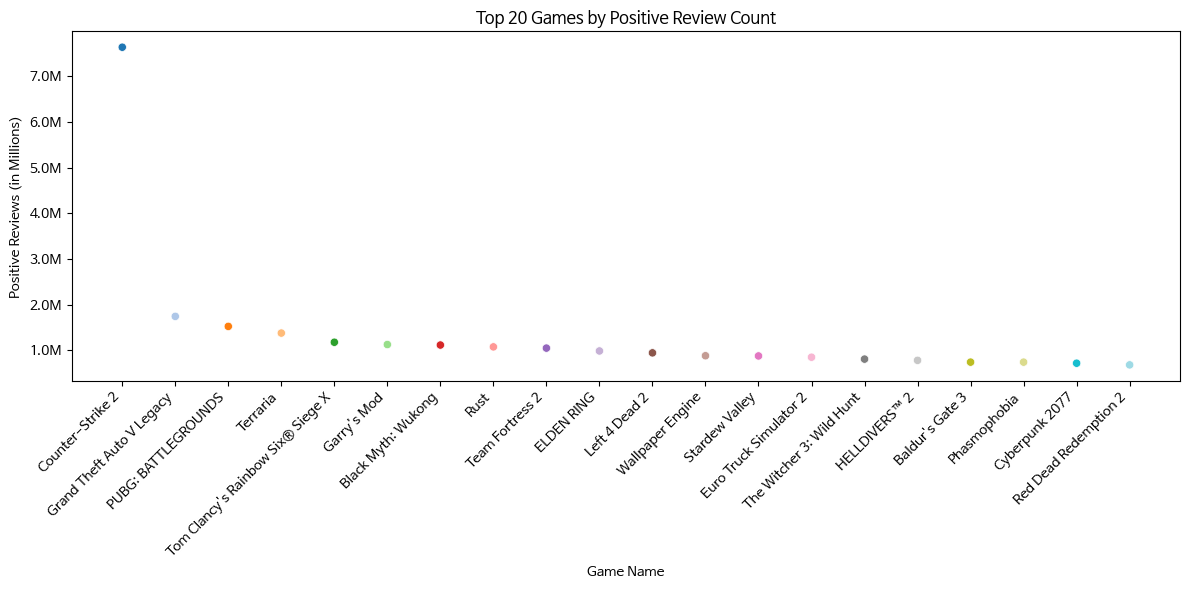

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# ÏÉÅÏúÑ 20Í∞ú Í≤åÏûÑÎßå Ï∂îÏ∂ú
top_games = df.sort_values(by='positive', ascending=False).head(20)

plt.figure(figsize=(12, 6))

# ÏÇ∞Ï†êÎèÑ (Í≤åÏûÑÎ≥Ñ ÏÉâÏÉÅ ÏßÄÏ†ï, Î≤îÎ°Ä Ï†úÍ±∞)
sns.scatterplot(data=top_games, x='name', y='positive', hue='name', palette='tab20', legend=False)

# yÏ∂ï: 100Îßå Îã®ÏúÑ Ìè¨Îß∑
formatter = FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# ÏãúÍ∞ÅÌôî ÏÑ∏Î∂Ä ÏÑ§Ï†ï
plt.xticks(rotation=45, ha='right')
plt.xlabel('Game Name')
plt.ylabel('Positive Reviews (in Millions)')
plt.title('Top 20 Games by Positive Review Count')
plt.tight_layout()
plt.show()


# Í≤∞Í≥º
*  Í∏çÏ†ïÏ†ÅÏù∏ Î¶¨Î∑∞ÏàòÎäî Ïπ¥Ïö¥ÌÑ∞-Ïä§Ìä∏ÎùºÏù¥ÌÅ¨2Í∞Ä 7,642,084	ÏúºÎ°ú ÏïïÎèÑÏ†ÅÏúºÎ°ú ÎßéÏù¥ Í∏∞Î°ùÌïòÏòÄÎã§
*  ÌèâÍ∑† :1,000,000 ~ 2,000,000


## ÏÉÅÏúÑ 20Í∞ú Í≤åÏûÑÏùò Î∂ÄÏ†ïÏ†Å Î¶¨Î∑∞ ÏÇ∞Ï†êÎèÑ

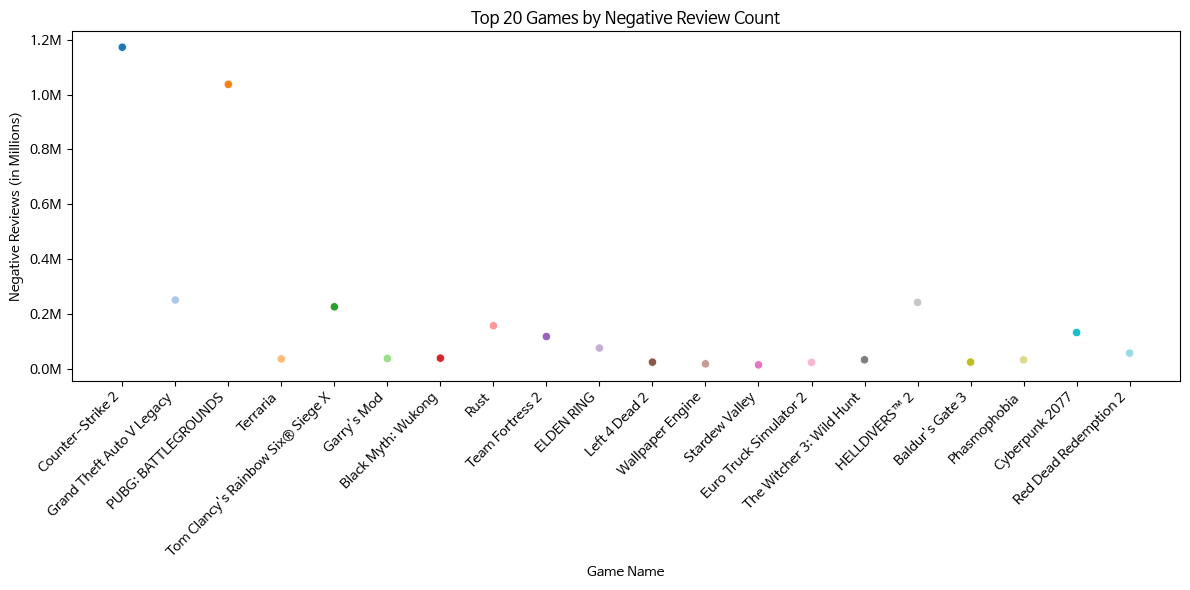

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# ÏÉÅÏúÑ 20Í∞ú Í≤åÏûÑÎßå Ï∂îÏ∂ú
top_games = df.sort_values(by='positive', ascending=False).head(20)

plt.figure(figsize=(12, 6))

# ÏÇ∞Ï†êÎèÑ (Í≤åÏûÑÎ≥Ñ ÏÉâÏÉÅ ÏßÄÏ†ï, Î≤îÎ°Ä Ï†úÍ±∞)
sns.scatterplot(data=top_games, x='name', y='negative', hue='name', palette='tab20', legend=False)

# yÏ∂ï: 100Îßå Îã®ÏúÑ Ìè¨Îß∑
formatter = FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# ÏãúÍ∞ÅÌôî ÏÑ∏Î∂Ä ÏÑ§Ï†ï
plt.xticks(rotation=45, ha='right')
plt.xlabel('Game Name')
plt.ylabel('Negative Reviews (in Millions)')
plt.title('Top 20 Games by Negative Review Count')
plt.tight_layout()
plt.show()

# Í≤∞Í≥º
*  Î∂ÄÏ†ïÏ†ÅÏù∏ Î¶¨Î∑∞ÏàòÎäî Ïπ¥Ïö¥ÌÑ∞-Ïä§Ìä∏ÎùºÏù¥ÌÅ¨2 Î∞è GTA 5Í∞Ä 100,000,0 ~ 120,000,0 ÏúºÎ°ú Í∞ÄÏû• ÎßéÏù¥ Í∏∞Î°ùÌïòÏòÄÎã§
*  ÌèâÍ∑† :10,000 ~ 20,000,0

## Í≤åÏûÑÏùò Ìù•ÌñâÍ≥º Ïú†ÌäúÎ∏åÏôÄÏùò Í¥ÄÍ≥Ñ - ÏÇ∞Ï†êÎèÑ

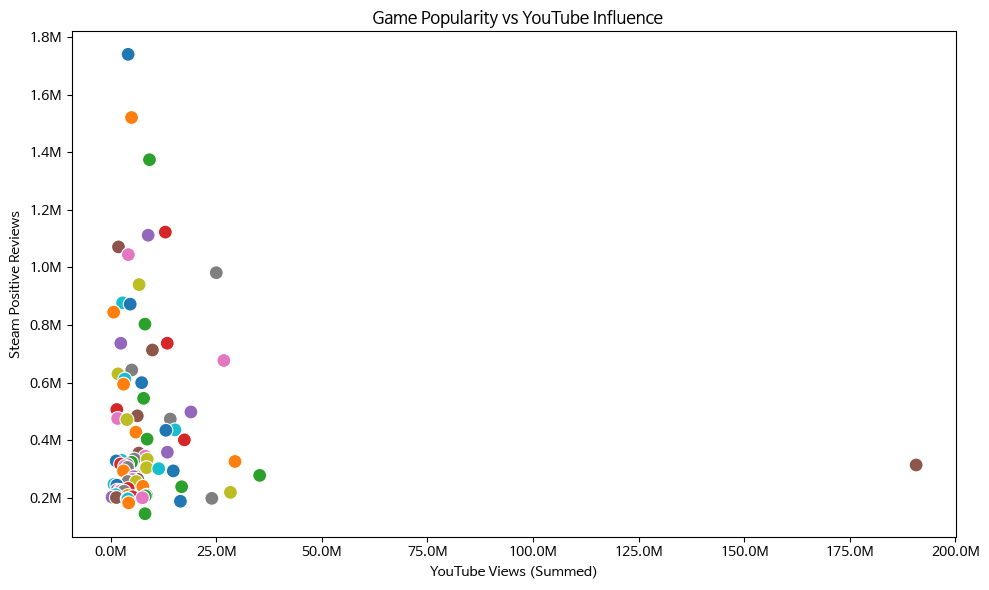

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(10, 6))

# ÏÇ∞Ï†êÎèÑ: Ïú†ÌäúÎ∏å Ï°∞ÌöåÏàò vs Ïä§ÌåÄ Í∏çÏ†ï Î¶¨Î∑∞ Ïàò
sns.scatterplot(
    data=df_merged,
    x='Views',
    y='positive',
    hue='name',
    palette='tab10',
    legend=False,
    s=100
)

# Ï∂ï Îã®ÏúÑ Ìè¨Îß∑ (Î∞±Îßå Îã®ÏúÑ)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y/1_000_000:.1f}M'))

plt.xlabel('YouTube Views (Summed)')
plt.ylabel('Steam Positive Reviews')
plt.title('üéÆ Game Popularity vs YouTube Influence')
plt.tight_layout()
plt.show()

# Í≤∞Í≥º
*  ÏÉÅÎãπÏàòÏùò Ïù∏Í∏∞ Í≤åÏûÑÏùò Ïú†ÌäúÎ∏å Ï°∞ÌöåÏàòÎäî Ï†ÄÏ°∞Ìïú Ìé∏
*  Î≤îÏúÑ :1,000,000 ~ 37,400,000
*  ÌèâÍ∑† :1,000,000 ~ 37,400,000

In [92]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   83 non-null     object        
 1   developers             83 non-null     object        
 2   is_free                83 non-null     bool          
 3   negative               83 non-null     int64         
 4   positive               83 non-null     int64         
 5   publishers             83 non-null     object        
 6   release_yyyy_mm        83 non-null     datetime64[ns]
 7   category_descriptions  83 non-null     object        
 8   genre_descriptions     83 non-null     object        
 9   tags_list              83 non-null     object        
 10  Game Name              83 non-null     object        
 11  Views                  83 non-null     int64         
 12  Likes                  83 non-null     int64         
 13  Comment

In [98]:
df_youtube_sum.shape

(99, 4)

In [99]:
df_steam_store.shape

(483, 10)

In [100]:
df_merged.shape

(83, 14)

In [101]:
df_youtube.shape

(990, 7)

In [103]:
df_steam_store['name'][400]

'The Elder Scrolls IV: Oblivion¬Æ Game of the Year Edition (2009)'